In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

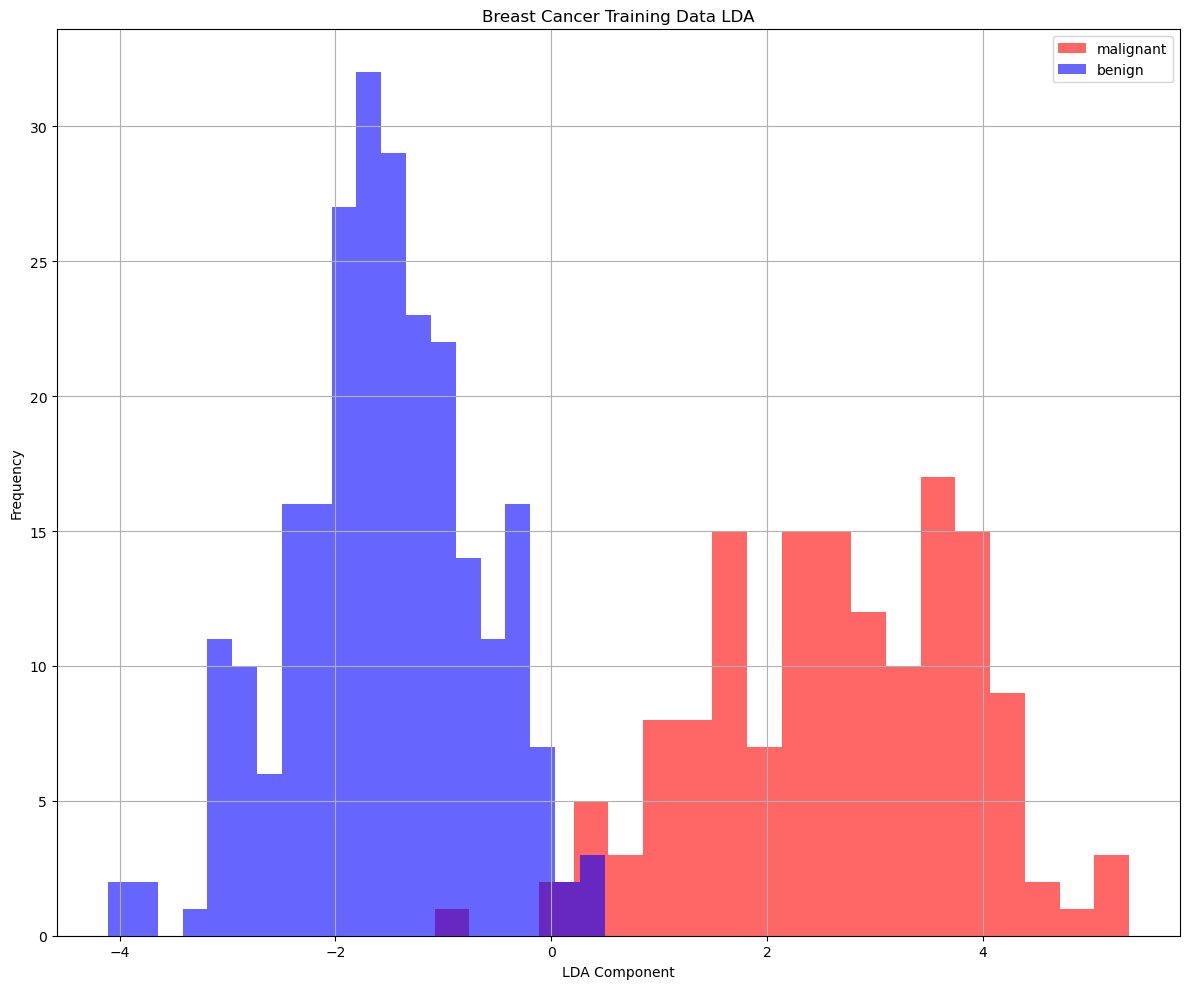

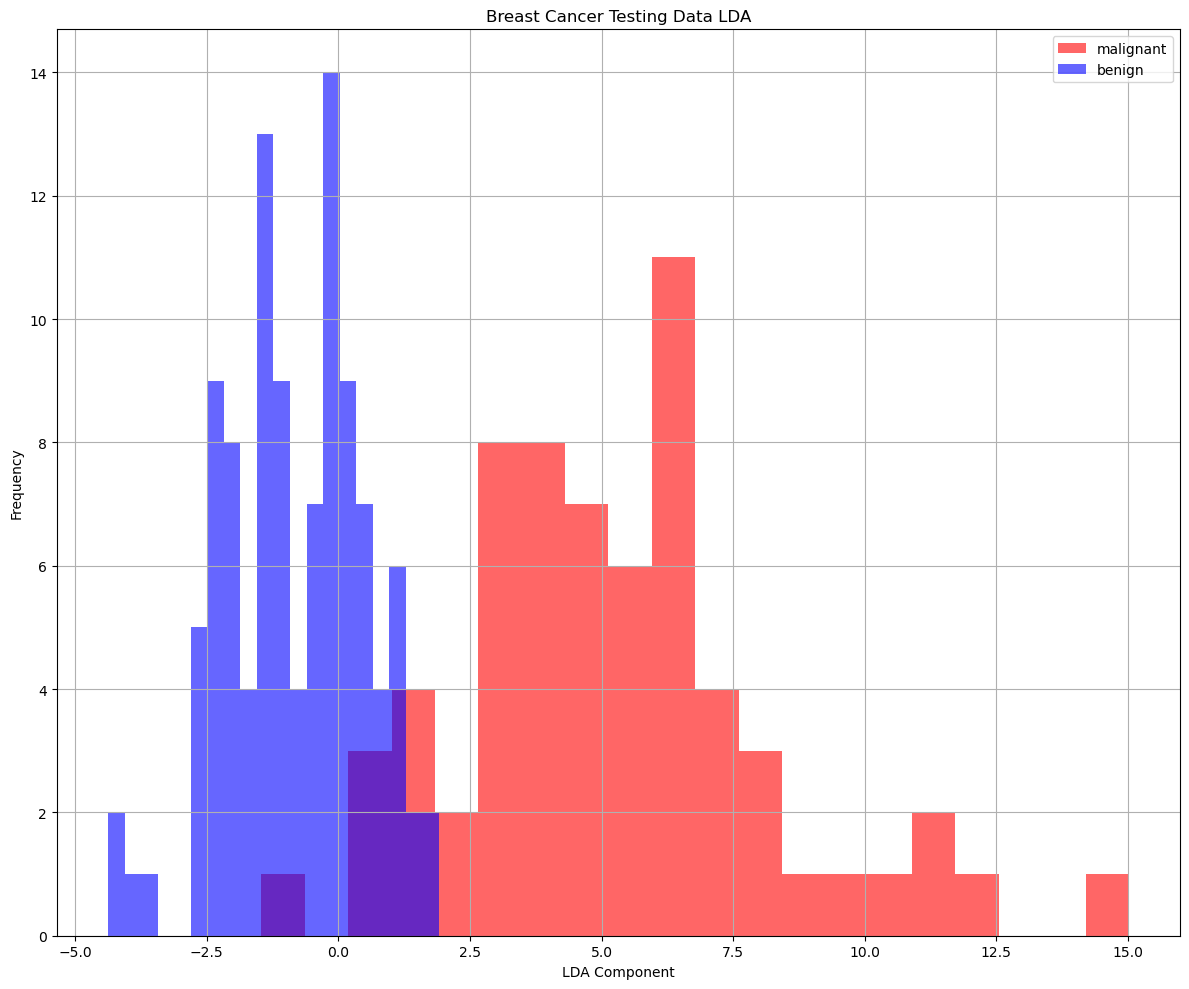

[I 2025-04-27 02:53:32,434] A new study created in memory with name: no-name-a133fc48-3f84-47b7-954e-2261b0d7fcd1
[I 2025-04-27 02:53:32,595] Trial 0 finished with value: 0.9824050632911392 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 26, 'p': 2}. Best is trial 0 with value: 0.9824050632911392.
[I 2025-04-27 02:53:32,827] Trial 1 finished with value: 0.982373417721519 and parameters: {'n_neighbors': 23, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 10, 'p': 2}. Best is trial 0 with value: 0.9824050632911392.
[I 2025-04-27 02:53:32,982] Trial 2 finished with value: 0.9799050632911392 and parameters: {'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 38, 'p': 2}. Best is trial 0 with value: 0.9824050632911392.
[I 2025-04-27 02:53:33,133] Trial 3 finished with value: 0.9823417721518988 and parameters: {'n_neighbors': 24, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 27, 'p': 1}. Best is tria

Best trial:
Accuracy: 0.9899683544303798
Best hyperparameters:  {'n_neighbors': 17, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 42, 'p': 2}


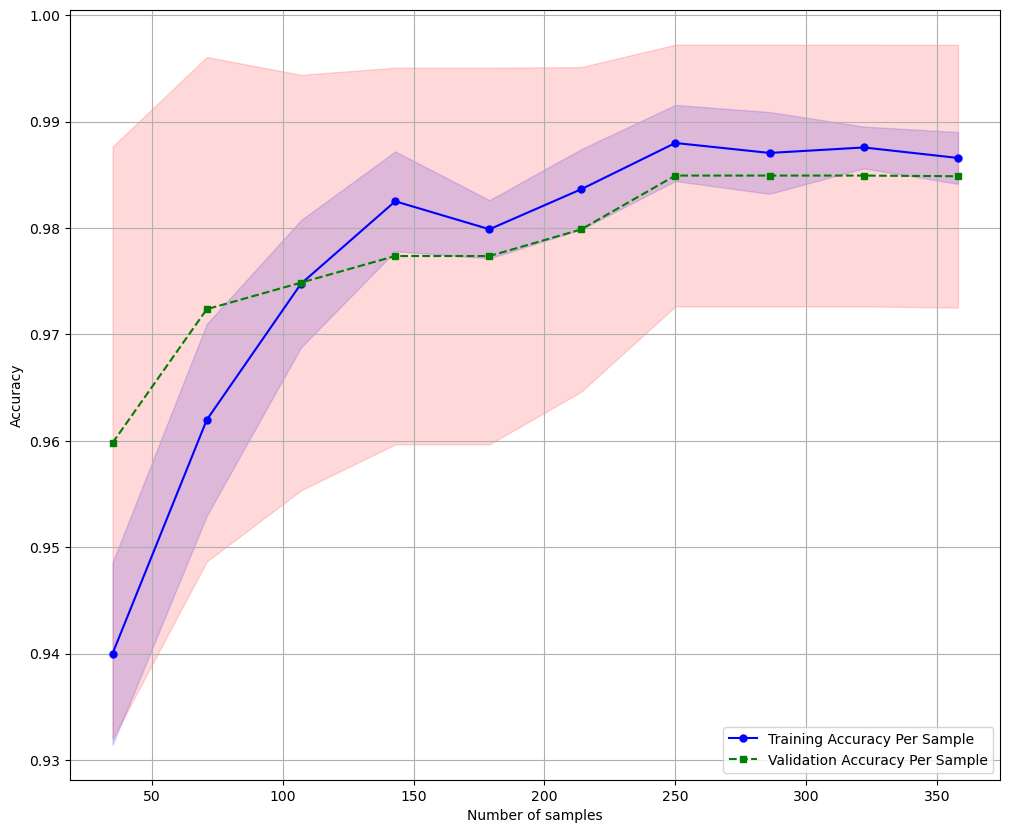

Confusion Matrix
[[63  1]
 [21 86]]
Accuracy: 0.8713, Precision: 0.9885, Recall: 0.8037, F1: 0.8866, AUC:0.9347


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'lda', {})

helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)